In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from astropy.table import Table


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
Tb_sat = Table.read("example_redMaPPer_sat.fits")
Tb_sat[0:5]
dsat = Tb_sat.to_pandas()
dsat.head()

,MEM_MATCH_ID,Index_v5_1,RA,DEC,RA_cen,DEC_cen,Pmem,log_R_R200m,Mr01,color
0,2,227,249.993929,46.792032,250.082548,46.711531,0.775326,-0.375305,-21.072046,1.007469
1,2,228,250.000886,46.786988,250.082548,46.711531,0.809685,-0.406056,-20.853582,0.839453
2,2,229,250.015394,46.777191,250.082548,46.711531,0.856308,-0.474836,-21.234037,0.948816
3,2,231,249.980582,46.758276,250.082548,46.711531,0.756115,-0.454225,-20.297346,0.801052
4,2,232,249.998467,46.740122,250.082548,46.711531,0.815902,-0.570429,-20.621931,0.829359


In [15]:
# delete cloumns RA_cen, DEC_cen
dsat=dsat.drop(['RA_cen', 'DEC_cen'], axis=1)
dsat.head()

,MEM_MATCH_ID,Index_v5_1,RA,DEC,Pmem,log_R_R200m,Mr01,color
0,2,227,249.993929,46.792032,0.775326,-0.375305,-21.072046,1.007469
1,2,228,250.000886,46.786988,0.809685,-0.406056,-20.853582,0.839453
2,2,229,250.015394,46.777191,0.856308,-0.474836,-21.234037,0.948816
3,2,231,249.980582,46.758276,0.756115,-0.454225,-20.297346,0.801052
4,2,232,249.998467,46.740122,0.815902,-0.570429,-20.621931,0.829359


In [22]:
dsat.describe()

,MEM_MATCH_ID,Index_v5_1,RA,DEC,Pmem,log_R_R200m,Mr01,color
count,174180.000000,174180.000000,174180.000000,174180.000000,174180.000000,174180.000000,174180.000000,174180.000000
mean,10006.303267,562144.394351,177.929075,23.373562,0.758249,-0.649578,-20.387390,0.882157
std,10202.015924,431407.583984,75.781234,18.752089,0.110870,0.332869,0.760160,0.125928
min,2.000000,227.000000,0.000292,-11.227486,0.550001,-2.576860,-23.333069,-0.085957
25%,2168.000000,190909.250000,141.508440,8.028306,0.663690,-0.834650,-20.918166,0.824712
50%,6731.000000,474411.500000,180.987372,21.422438,0.770103,-0.587511,-20.332050,0.900344
75%,14578.000000,856051.250000,221.270248,36.740931,0.856727,-0.401709,-19.791376,0.957752
max,83192.000000,1777326.000000,359.999725,68.617321,0.939182,-0.030784,-18.442911,2.208332


## groupby

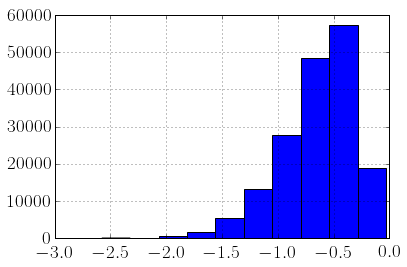

In [24]:
dsat['log_R_R200m'].hist()

In [25]:
log_r_bins=np.array([-3, -1.9, -1.4, -0.9 , -0.4, 0.0])

In [26]:
data_cut=pd.cut(dsat.log_R_R200m,log_r_bins)
grp = dsat.groupby(by = data_cut)

In [29]:
grp.mean()

,MEM_MATCH_ID,Index_v5_1,RA,DEC,Pmem,log_R_R200m,Mr01,color
log_R_R200m,,,,,,,,
"(-3, -1.9]",9082.026930,521416.016158,177.630691,23.677549,0.864328,-2.040803,-20.843357,0.942814
"(-1.9, -1.4]",10518.354213,588668.886554,176.695467,22.785618,0.869227,-1.564458,-20.441366,0.918417
"(-1.4, -0.9]",10516.098992,585547.602402,177.767812,23.330391,0.857062,-1.087180,-20.293526,0.885130
"(-0.9, -0.4]",10341.870797,575696.720066,177.779608,23.332504,0.761892,-0.619132,-20.314646,0.872330
"(-0.4, 0]",8862.418856,513366.829788,178.516088,23.557331,0.667384,-0.290276,-20.601731,0.896931


In [30]:
grp.describe()

MEM_MATCH_ID      Index_v5_1            RA           DEC  \
log_R_R200m                                                                    
(-3, -1.9]   count    557.000000      557.000000    557.000000    557.000000   
             mean    9082.026930   521416.016158    177.630691     23.677549   
             std     9772.362934   409282.676123     82.033032     18.769757   
             min        2.000000      437.000000      0.211324    -10.567477   
             25%     2050.000000   182423.000000    139.073597      8.303773   
             50%     6138.000000   441591.000000    181.256636     21.370075   
             75%    12312.000000   755412.000000    224.039908     37.875156   
             max    74580.000000  1772927.000000    359.125541     68.004310   
(-1.9, -1.4] count   4901.000000     4901.000000   4901.000000   4901.000000   
             mean   10518.354213   588668.886554    176.695467     22.785618   
             std    10227.032791   428833.601757     77.285248     18.681921   
             min        2.000000      433.000000      0.011681    -11.136825   
             25%     2578.000000   219720.000000    139.550923      7.747470   
             50%     7559.000000   519641.000000    180.143129     20.540234   
             75%    15231.000000   882997.000000    219.904722     35.969257   
             max    77624.000000  1774762.000000    359.618214     68.595628   
(-1.4, -0.9] count  30063.000000    30063.000000  30063.000000  30063.000000   
             mean   10516.098992   585547.602402    177.767812     23.330391   
             std    10416.249805   435578.737811     76.461189     18.654311   
             min        2.000000      249.000000      0.000292    -11.208857   
             25%     2436.000000   210417.000000    141.261999      8.127121   
             50%     7314.000000   506927.000000    181.210407     21.366001   
             75%    15392.000000   888968.000000    221.835763     36.596253   
             max    83192.000000  1777320.000000    359.999451     68.593008   
(-0.9, -0.4] count  95501.000000    95501.000000  95501.000000  95501.000000   
             mean   10341.870797   575696.720066    177.779608     23.332504   
             std    10453.071016   438620.506698     76.030770     18.810167   
             min        2.000000      228.000000      0.000853    -11.227486   
             25%     2241.000000   195888.000000    141.235486      7.965837   
             50%     6970.000000   488197.000000    180.699445     21.340651   
             75%    15285.000000   885019.000000    221.089910     36.801912   
             max    83192.000000  1777326.000000    359.999725     68.603492   
(-0.4, 0]    count  43158.000000    43158.000000  43158.000000  43158.000000   
             mean    8862.418856   513366.829788    178.516088     23.557331   
             std     9370.808600   408590.931479     74.484605     18.697705   
             min        2.000000      227.000000      0.021653    -11.159312   
             25%     1871.000000   169838.250000    142.550852      8.243620   
             50%     5701.000000   416955.500000    181.709693     21.753115   
             75%    12824.000000   779525.500000    221.555481     36.918246   
             max    75833.000000  1773885.000000    359.977904     68.617321   

                            Pmem   log_R_R200m          Mr01         color  
log_R_R200m                                                                 
(-3, -1.9]   count    557.000000    557.000000    557.000000    557.000000  
             mean       0.864328     -2.040803    -20.843357      0.942814  
             std        0.086398      0.114931      0.746631      0.112746  
             min        0.557319     -2.576860    -23.097220      0.463308  
             25%        0.857435     -2.101075    -21.406942      0.898231  
             50%        0.897733     -2.020584    -20.810534      0.955845  
             75%        0.917591     -1.946

In [43]:
df_bin=grp["log_R_R200m","Mr01"].agg(["mean","std","count"])
df_bin

log_R_R200m                        Mr01                 
                    mean       std  count       mean       std  count
log_R_R200m                                                          
(-3, -1.9]     -2.040803  0.114931    557 -20.843357  0.746631    557
(-1.9, -1.4]   -1.564458  0.128800   4901 -20.441366  0.776538   4901
(-1.4, -0.9]   -1.087180  0.134849  30063 -20.293526  0.747408  30063
(-0.9, -0.4]   -0.619132  0.138603  95501 -20.314646  0.745253  95501
(-0.4, 0]      -0.290276  0.073337  43158 -20.601731  0.756009  43158

goal: plot mean, and standard error of the mean, $\sigma/\sqrt N$, on each $log(r/R_{\rm 200m})$ bin

In [44]:
df_bin["log_R_R200m"]["mean"]

log_R_R200m
(-3, -1.9]     -2.040803
(-1.9, -1.4]   -1.564458
(-1.4, -0.9]   -1.087180
(-0.9, -0.4]   -0.619132
(-0.4, 0]      -0.290276
Name: mean, dtype: float64

In [60]:
x_avg=list(df_bin["log_R_R200m"]["mean"])
y_avg=list(df_bin["Mr01"]["mean"])
y_std=list((df_bin["Mr01"]["std"]))
y_err=list((df_bin["Mr01"]["std"])/np.sqrt(df_bin["Mr01"]["count"]))

(-22, -19)

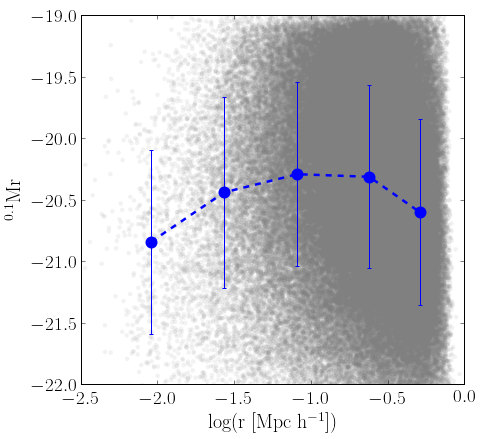

In [61]:
fig = plt.figure(figsize=(6.5, 6.25))
plt.rc('text', usetex=True)      
plt.rc('font',size=19)  

ax1=fig.add_axes([0.17,0.15,0.82,0.82])

ax1.scatter(dsat.log_R_R200m,dsat.Mr01,color='gray',alpha=0.1,edgecolors="none")

#ax1.errorbar(x_avg,y_avg,yerr=y_err,color='b',capsize=2,capthick=1, elinewidth=1,linewidth=2.5,fmt="o--",markeredgecolor='none',markersize=12)
ax1.errorbar(x_avg,y_avg,yerr=y_std,color='b',capsize=2,capthick=1, elinewidth=1,linewidth=2.5,fmt="o--",markeredgecolor='none',markersize=12)



ax1.set_ylabel(r'$\mathrm{^{0.1}Mr}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{log(r\ [Mpc\ h^{-1}])}$',fontsize=20)

ax1.set_xlim([-2.5,0])
ax1.set_ylim([-22,-19])

### a more advanced example, calculate weighted average

In [68]:
def Werr_y(group):
    y = group['Mr01']
    w = group['Pmem']
    Neff = w.sum()
    Wavg = (y * w).sum() / Neff
    Wvar = ((y-Wavg)**2 * w ).sum() / Neff
    Wstd = np.sqrt(Wvar)    
    Werr = Wstd / np.sqrt(Neff)
    return Werr


def Wstd_y(group):
    y = group['Mr01']
    w = group['Pmem']
    Neff = w.sum()
    Wavg = (y * w).sum() / Neff
    Wvar = ((y-Wavg)**2 * w ).sum() / Neff
    Wstd = np.sqrt(Wvar)    
    return Wstd

Wavg_y = lambda g: np.average(g['Mr01']       , weights=g['Pmem'])
Wavg_x = lambda g: np.average(g['log_R_R200m'], weights=g['Pmem'])


In [65]:
grp.apply(Wavg_y)

log_R_R200m
(-3, -1.9]     -20.851219
(-1.9, -1.4]   -20.450791
(-1.4, -0.9]   -20.309257
(-0.9, -0.4]   -20.340508
(-0.4, 0]      -20.605911
dtype: float64

In [69]:
oWavg_y = list(grp.apply(Wavg_y))
oWavg_x = list(grp.apply(Wavg_x))
oWerr_y = list(grp.apply(Werr_y))
oWstd_y = list(grp.apply(Wstd_y))

(-22, -19)

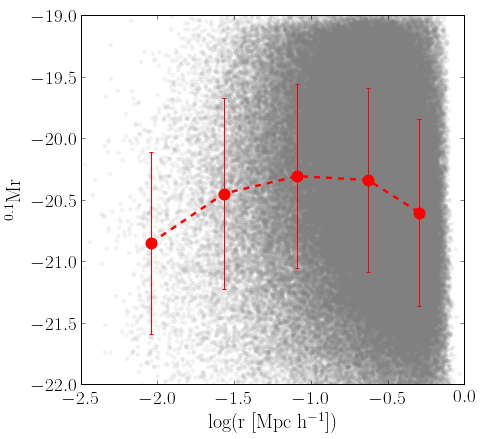

In [70]:
fig = plt.figure(figsize=(6.5, 6.25))
plt.rc('text', usetex=True)      
plt.rc('font',size=19)  

ax1=fig.add_axes([0.17,0.15,0.82,0.82])

ax1.scatter(dsat.log_R_R200m,dsat.Mr01,color='gray',alpha=0.1,edgecolors="none")

#ax1.errorbar(oWavg_x,oWavg_y,yerr=oWerr_y,color='r',capsize=2,capthick=1, elinewidth=1,linewidth=2.5,fmt="o--",markeredgecolor='none',markersize=12)
ax1.errorbar(oWavg_x,oWavg_y,yerr=oWstd_y,color='r',capsize=2,capthick=1, elinewidth=1,linewidth=2.5,fmt="o--",markeredgecolor='none',markersize=12)


ax1.set_ylabel(r'$\mathrm{^{0.1}Mr}$',fontsize=20)
ax1.set_xlabel(r'$\mathrm{log(r\ [Mpc\ h^{-1}])}$',fontsize=20)

ax1.set_xlim([-2.5,0])
ax1.set_ylim([-22,-19])

In [ ]:
ss